# 데이터셋 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np


In [3]:
boston_df = pd.read_csv('./Data/boston.csv')

In [4]:
def check_data(data):
	print(data.info())
	print(f'data.columns : {data.columns}')
	print(f'data.index : {data.index}')
	print(f'data.describe() : {data.describe()}')
	print(f'결측치 확인 : \n{data.isnull().sum()}')


check_data(boston_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
data.columns : Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
data.index : RangeIndex(start=0, stop=506, step=1)
data.describe() :              C

# [독립변수 분석]
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)
- 각 컬럼별로 주택가격에 미치는 영향도를 조사


# 각 컬럼별 상관계수 및 데이터 조사

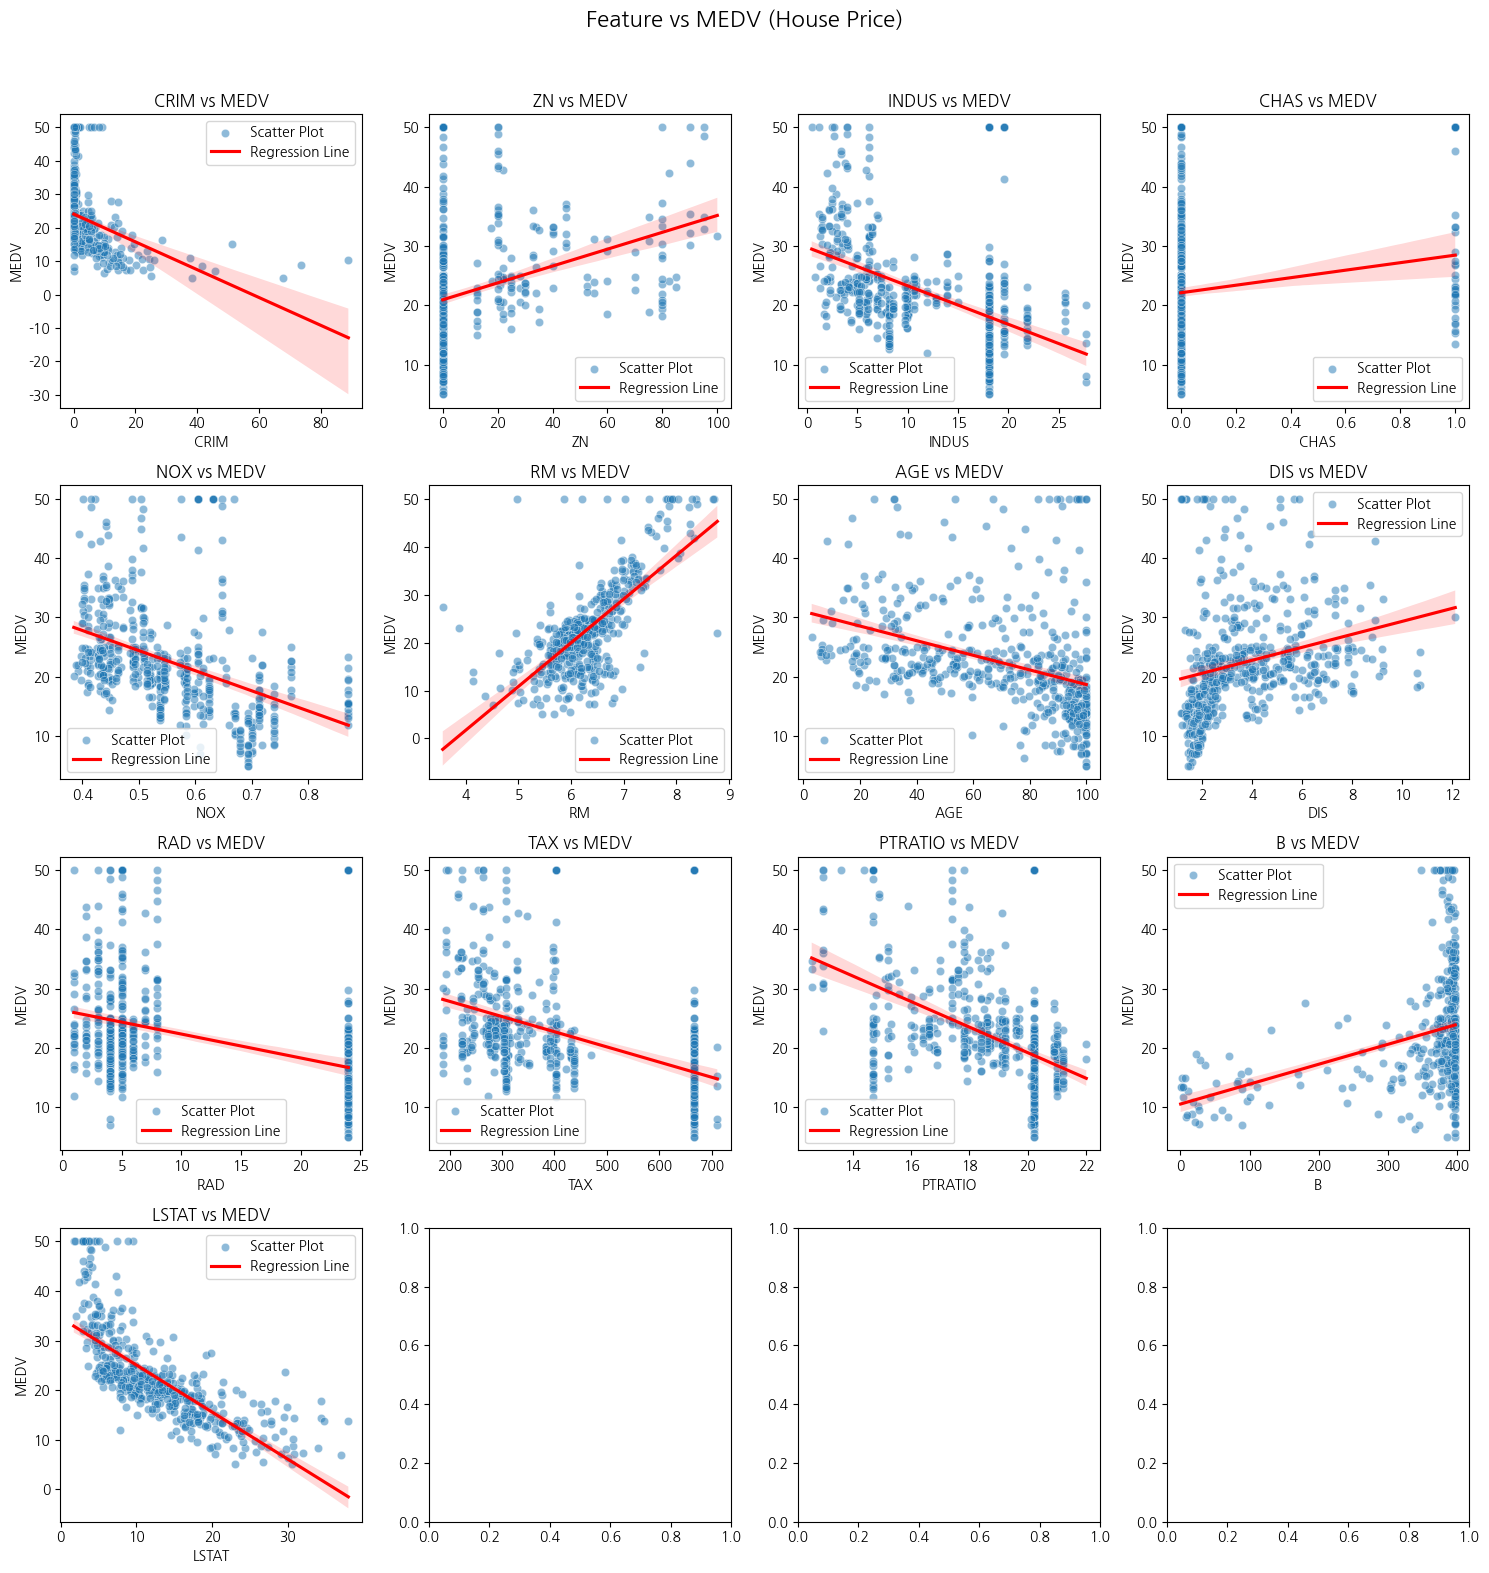

In [5]:
# 학습용 데이터 셋 시각화 분석 

feature_DF = boston_df.iloc[:,:-1]
target_DF = boston_df.iloc[:, -1]

# 각 컬럼별 상관계수 및  시각화

num_features = len(feature_DF.columns)

# 행(row)과 열(column) 개수 설정 (예: 3열로 배치)
cols = 4
rows = (num_features // cols) + (num_features % cols > 0)  # 전체 Feature 개수를 고려한 행 개수 설정

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # 화면 크기 조정
fig.suptitle("Feature vs MEDV (House Price)", fontsize=16)  # 전체 제목

# 모든 Feature에 대해 반복 실행
for idx, i in enumerate(feature_DF.columns):
    row = idx // cols  # 현재 행 위치
    col = idx % cols  # 현재 열 위치
    ax = axes[row, col] if rows > 1 else axes[col]  # 서브플롯 선택

    # 산점도 (Feature vs Target)
    sns.scatterplot(x=feature_DF[i], y=target_DF, alpha=0.5, ax=ax, label="Scatter Plot")

    # 선형 회귀선 추가 (트렌드 확인용)
    sns.regplot(x=feature_DF[i], y=target_DF, scatter=False, color="red", ax=ax, label="Regression Line")

    # 그래프 제목 및 라벨
    ax.set_title(f'{i} vs MEDV')
    ax.set_xlabel(i)
    ax.set_ylabel("MEDV")
    ax.legend()

# 서브플롯 간격 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 전체 제목과 겹치지 않도록 조정
plt.show()



MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


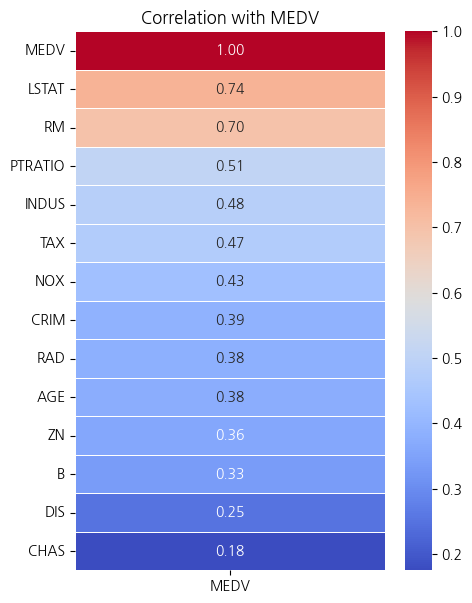

In [6]:
# 히트맵으로 시각화
correlation_matrix = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']].corr()
#print(correlation_matrix)

# MEDV와 각 Feature의 상관계수만 출력 # 절댓값 기준 내림차순 정렬 (강한 상관관계를 쉽게 확인)
medv_correlation = correlation_matrix['MEDV'].abs().sort_values(ascending=False)

print(medv_correlation)
plt.figure(figsize=(5, 7))
sns.heatmap(medv_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with MEDV")
plt.show()

In [7]:
# 각 컬럼의 정규화 과정 필요 판단
from sklearn.preprocessing import StandardScaler


# 정규화 객체 생성
scaler = StandardScaler()

# 정규화 적용 feature_DF (훈련 데이터로만 fit)
X_scaled = scaler.fit_transform(feature_DF)


# 변환된 데이터 프레임 생성
df_scaled = pd.DataFrame(X_scaled, columns=feature_DF.columns)

# 정규화된 데이터 확인
df_scaled.head()







,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [8]:
print("정규화 후 평균값:\n", df_scaled.mean())
print("\n정규화 후 표준편차:\n", df_scaled.std())



정규화 후 평균값:
 CRIM      -1.123388e-16
ZN         7.898820e-17
INDUS      2.106352e-16
CHAS      -3.510587e-17
NOX       -1.965929e-16
RM        -1.088282e-16
AGE       -1.474446e-16
DIS       -8.425408e-17
RAD       -1.123388e-16
TAX        0.000000e+00
PTRATIO   -4.212704e-16
B         -7.442444e-16
LSTAT     -3.089316e-16
dtype: float64

정규화 후 표준편차:
 CRIM       1.00099
ZN         1.00099
INDUS      1.00099
CHAS       1.00099
NOX        1.00099
RM         1.00099
AGE        1.00099
DIS        1.00099
RAD        1.00099
TAX        1.00099
PTRATIO    1.00099
B          1.00099
LSTAT      1.00099
dtype: float64


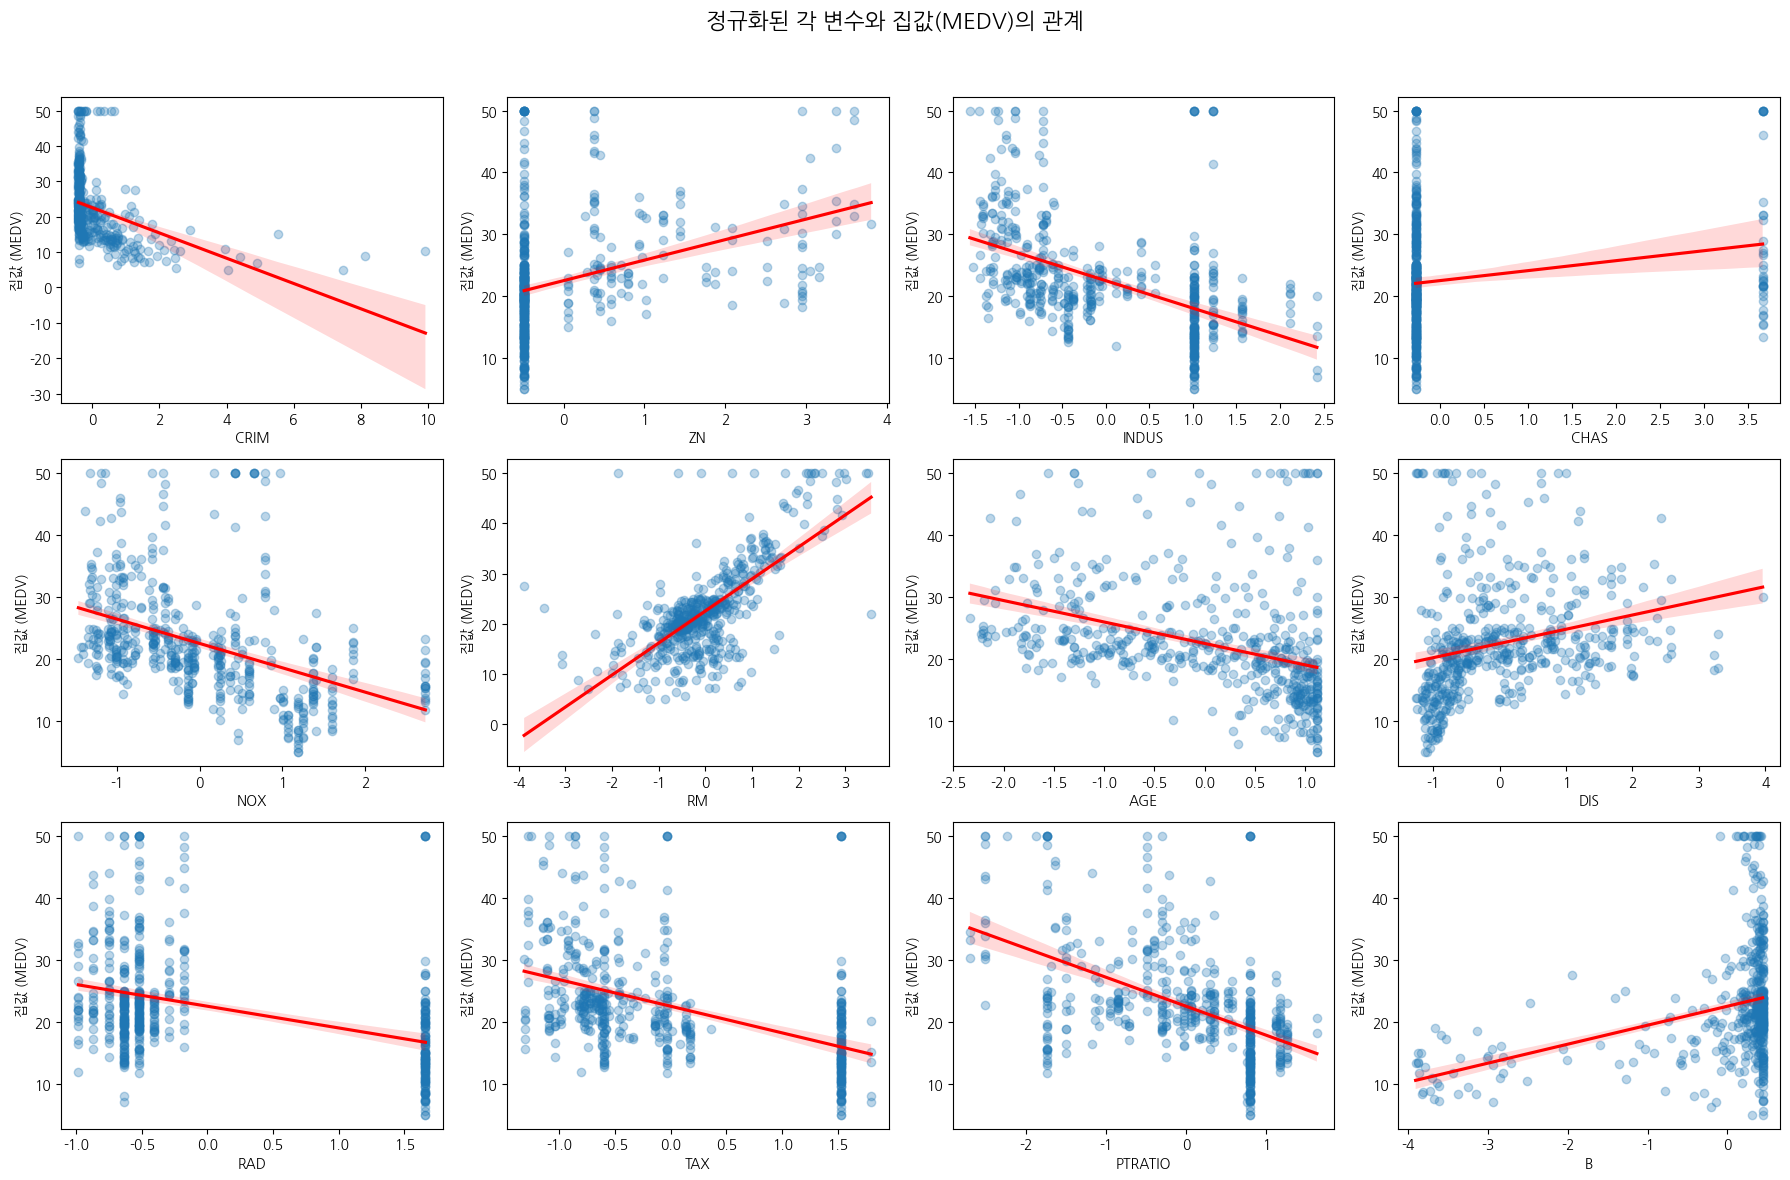

In [9]:
# 다시 시각화

# 서브플롯 생성 (각 독립 변수 vs 집값 시각화)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
fig.suptitle("정규화된 각 변수와 집값(MEDV)의 관계", fontsize=16)

# 각 컬럼을 순서대로 플롯에 할당
columns = df_scaled.columns
for i, ax in enumerate(axes.flat):
    if i < len(columns):  # 컬럼 개수보다 서브플롯 개수가 많을 수 있음
        sns.regplot(x=df_scaled[columns[i]], y=target_DF, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"}, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel("집값 (MEDV)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()


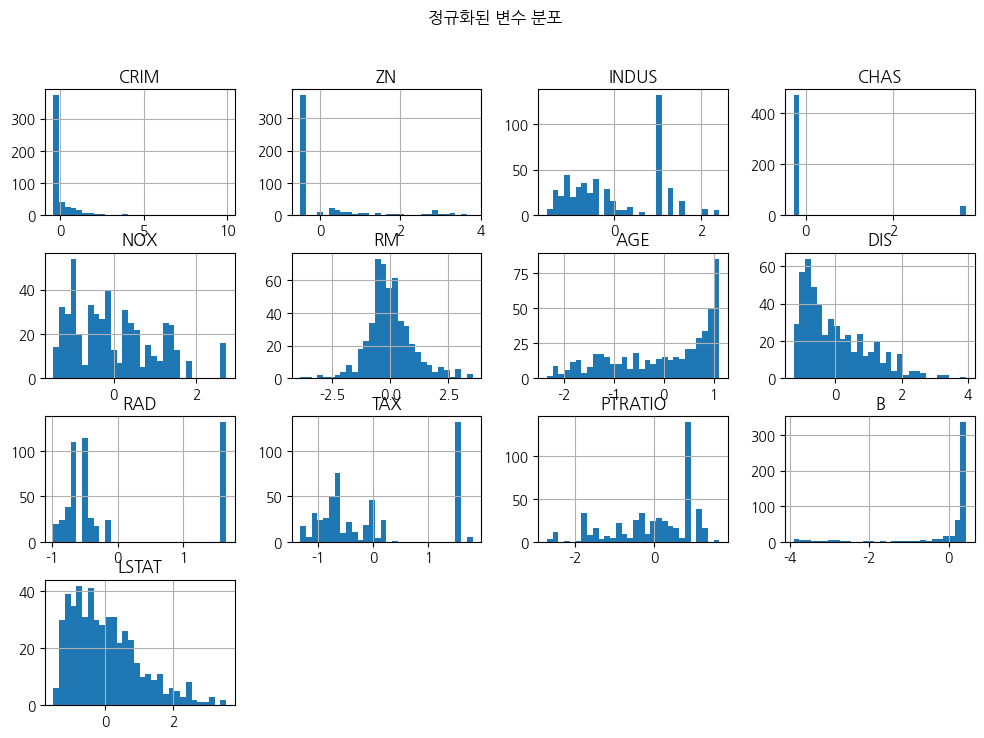

In [10]:
import matplotlib.pyplot as plt

# 정규화된 데이터 히스토그램 시각화
df_scaled.hist(figsize=(12, 8), bins=30)
plt.suptitle("정규화된 변수 분포")
plt.show()

In [11]:
df_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
# 회귀 모델 진행

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error


target_DF
# 정규화 
#feature_DF_setting = df_scaled.loc[:,['CRIM', 'INDUS', 'NOX', 'RM', 'AGE','CHAS', 'DIS','PTRATIO', 'TAX','B', 'LSTAT']] 
feature_DF_setting = df_scaled.loc[:,['CRIM', 'INDUS', 'NOX', 'RM', 'AGE','CHAS', 'DIS','PTRATIO', 'TAX','B', 'LSTAT']] 

X_train, X_test ,y_train, y_test = train_test_split(feature_DF_setting, target_DF, test_size=0.15 ,random_state= 156) 



# 모델 선형회귀 모델

lr_model = LinearRegression()

# 모델 학습
lr_model.fit(X_train,y_train)



LinearRegression()

In [13]:
# 모델 예측값 검증

y_pred = lr_model.predict(X_test)

In [14]:
score = lr_model.score(X_test,y_test)
print(score)

0.8221530202971231


In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.4f}, RMSE : {rmse:.4f}')

MSE : 17.3567, RMSE : 4.1661


In [16]:
# 절편과 회귀계수 확인

print(f'회귀계수 값 : {lr_model.coef_}')
print(f'절편 값 : {lr_model.intercept_}')

회귀계수 값 : [-0.51420541 -0.43750642 -2.01613859  2.88575111 -0.18662111  0.80449434
 -2.61891066 -2.10118696  0.70177748  0.83961498 -3.71785519]
절편 값 : 22.640804149007437


In [17]:
# 회귀계수를 큰 값 순으로 정렬하기 위해 Series 로 생성, 인덱스 컬럼명에 유의

coeff = pd.Series(data=np.round(lr_model.coef_,1), index=feature_DF_setting.columns)
coeff.sort_values(ascending=False)

RM         2.9
CHAS       0.8
B          0.8
TAX        0.7
AGE       -0.2
INDUS     -0.4
CRIM      -0.5
NOX       -2.0
PTRATIO   -2.1
DIS       -2.6
LSTAT     -3.7
dtype: float64

# 교차검증

In [18]:
from sklearn.model_selection import cross_val_score

## cross_val_score() 로 5 폴드 세트로 MSE 를 구한뒤 이를 기반으로 다시 RMSE 구함

neg_mse_score = cross_val_score(lr_model,feature_DF_setting, target_DF, scoring='neg_mean_squared_error', cv=5)
rmse_score = np.sqrt(-1*neg_mse_score)

avg_rmse = np.mean(rmse_score)

# cross_val_score(scoring='neg_mean_squared_error')  로 반환된 값은 모두 음수

print(f'5 flods 의 개별 : Negativae MSE scores: {np.round(neg_mse_score,2)}')
print(f'5 flods 의 개별 : RMSE scores: {np.round(rmse_score,2)}')
print(f'5 flods 의 평균 : RMSE scores: {avg_rmse:0.3f}')


5 flods 의 개별 : Negativae MSE scores: [-12.34 -27.35 -34.21 -85.48 -22.03]
5 flods 의 개별 : RMSE scores: [3.51 5.23 5.85 9.25 4.69]
5 flods 의 평균 : RMSE scores: 5.706


# 다항회귀

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 변환 객체 생성(2차 항 추가)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 다항 회귀 모델 학습

lr_model.fit(X_train_poly, y_train)

# 예측 및 평가
y_pred_poly = lr_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"다항 회귀 MSE: {mse_poly:.3f}")
print(f"다항 회귀 R² Score: {r2_poly:.3f}")

다항 회귀 MSE: 15.093
다항 회귀 R² Score: 0.845


# 다항회귀 시각화

In [20]:
feature_DF_setting.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'CHAS', 'DIS', 'PTRATIO', 'TAX',
       'B', 'LSTAT'],
      dtype='object')

c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\seaborn\regression.py:261: Ra

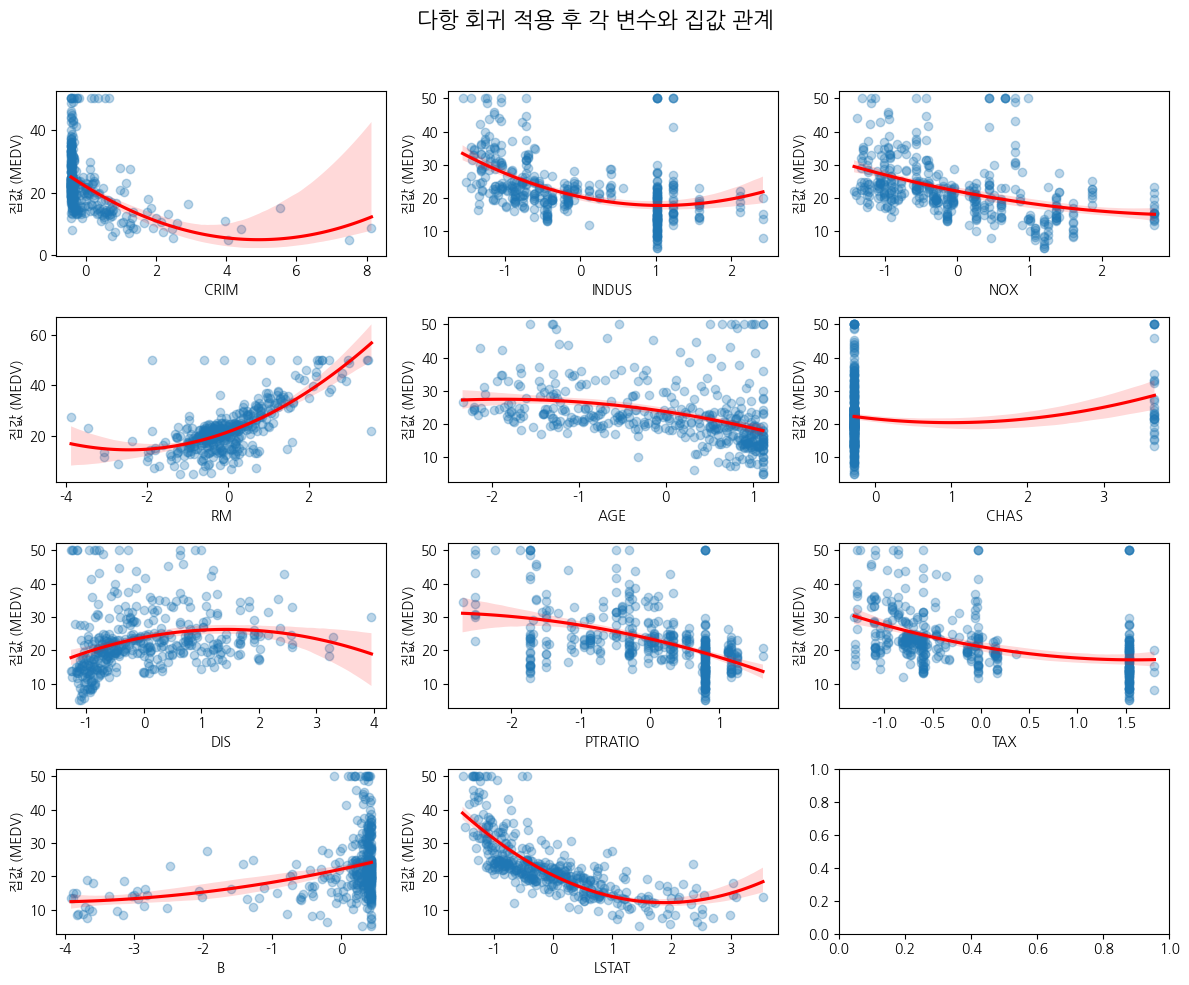

In [25]:
fig, axes = plt.subplots(4, 3, figsize=(12, 10))
fig.suptitle("다항 회귀 적용 후 각 변수와 집값 관계", fontsize=16)

for idx, feature in enumerate(feature_DF_setting):
    ax = axes[idx//3, idx%3]
    sns.regplot(x=X_train[feature], y=y_train, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"}, ax=ax, order=2)
    ax.set_xlabel(feature)
    ax.set_ylabel("집값 (MEDV)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# # 서브플롯 생성
# fig, axes = plt.subplots(3, 4, figsize=(16, 12))
# fig.suptitle("다항 회귀 적용 후 각 변수와 집값 관계", fontsize=16)

# # 각 변수별 회귀선 그리기
# for idx, feature in enumerate(feature_DF_setting):
#     row, col = divmod(idx, 4)
#     ax = axes[row, col]
#     sns.regplot(x=X_train[feature], y=y_train, scatter_kws={"alpha": 0.3}, line_kws={"color": "red"}, ax=ax, order=2)  # ✅ 다항 회귀 반영
#     ax.set_xlabel(feature)
#     ax.set_ylabel("집값 (MEDV)")

# plt.tight_layout()
# plt.show()

In [54]:
# 라쏘 회귀 모델 적용

from sklearn.linear_model import Lasso


# 라쏘 회귀 모델 적용
lasso_model = Lasso(alpha=0.05) # a 값이 클수록 더 많은 변수가 제거됨
lasso_model.fit(X_train_poly, y_train)

y_pred_lasso = lasso_model.predict(X_test_poly)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)


print(f"라쏘 회귀 RMSE: {lasso_rmse:.3f}")
print(f"라쏘 회귀 R² Score: {lasso_r2:.3f}")

라쏘 회귀 RMSE: 2.600
라쏘 회귀 R² Score: 0.931


In [56]:
from sklearn.linear_model import LassoCV

# 최적의 α 값을 찾기 위한 LassoCV 적용
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 10), cv=5)  # 여러 α 값 테스트
lasso_cv.fit(X_train_poly, y_train)

print(f"최적의 α 값: {lasso_cv.alpha_:.4f}")

최적의 α 값: 0.0215


c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7433910293434565, tolerance: 3.078168883720931
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.2347635070064, tolerance: 3.078168883720931
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542.7707719914761, tolerance: 3.078168883720931
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-package

# 릿지 회귀 

In [87]:
from sklearn.linear_model import Ridge
# 릿지는 모분변수를 유지하면서도 과적합을 방지하여 모델을 안정화 역할

# 릿지 회귀 모델 적용 (alpha=1.0)
ridge_model = Ridge(alpha=15)
ridge_model.fit(X_train_poly, y_train)


# 예측 및 평가
y_pred_ridge = ridge_model.predict(X_test_poly)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)


print(f"릿지 회귀 RMSE: {ridge_rmse:.3f}")
print(f"릿지 회귀 R² Score: {ridge_r2:.3f}")


from sklearn.linear_model import RidgeCV

# 여러 개의 α 값 테스트 후 최적의 값 찾기
ridge_cv = RidgeCV(alphas=np.logspace(-3, 1, 10), cv=5)
ridge_cv.fit(X_train_poly, y_train)

print(f"최적의 α 값: {ridge_cv.alpha_:.4f}")

릿지 회귀 RMSE: 2.800
릿지 회귀 R² Score: 0.920
최적의 α 값: 10.0000
